# Llibreries científiques en Python - pandas

## Series

Una sèrie és un vector unidimensional amb etiquetes als eixos i
dades homogènies.Repassem què impliquen cadascuna d'aquestes característiques amb uns
exemples.La sèrie ens permet representar un conjunt de dades unidimensionals,
per exemple, una llista d'enters, decimals o de cadenes de caràcters:

## DataFrames

Un dataframe és una taula bidimensional amb etiquetes als eixos
i dades potencialment heterogènies. El dataframe és l' estructura
principal de treball amb la llibreria pandas.A diferència d'una sèrie, un dataframe és bidimensional:

### Operacions bàsiques - DataFrame

#### Lectura sobre Fitxer

Pandas ens permet carregar les dades d'un fitxer CSV directament a un dataframe a través de la funció read_csv.

Ara carregarem les dades del fitxer [marvel-wikia-data.csv](https://github.com/fivethirtyeight/data/tree/master/comic-characters) 



In [164]:
"""import pandas as pd
import matplotlib.pyplot as plt
dataMarvel = pd.read_csv('marvel-wikia-data.csv')
print(dataMarvel.loc[20:25, ['name', 'APPEARANCES']])
male = dataMarvel[dataMarvel.SEX == "Male Characters"]
female = dataMarvel[dataMarvel.SEX == "Female Characters"]
nonbinary = dataMarvel[(dataMarvel.SEX != "Female Characters") & (dataMarvel.SEX != "Male Characters")]
popularFem = female.sort_values('APPEARANCES',ascending = False)[0:3][['name', 'APPEARANCES']]
secPop = dataMarvel[(dataMarvel.APPEARANCES > 2000) & (dataMarvel.ID == 'Secret Identity')]
grouped = dataMarvel.groupby("ALIGN")
for name, group in grouped:
    print(name, len(group))
grouped.agg({'APPEARANCES': 'min'})
new_dataset = dataMarvel[['name', 'ID', 'HAIR']][0:100]
new_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding='utf-8')
app_name = dataMarvel.groupby(['name'])['APPEARANCES'].sum()
app_name_top10 = app_name.sort_values(ascending=False)[0:10]
app_name_top10.plot(kind='bar')
plt.title('Top 10 appearances characters')
plt.show()
data_years = dataMarvel.groupby('Year')['page_id'].count()
data_years.plot(x='Year', y='page_id', kind='line')
plt.show()
data_years.hist()"""

'import pandas as pd\nimport matplotlib.pyplot as plt\ndataMarvel = pd.read_csv(\'marvel-wikia-data.csv\')\nprint(dataMarvel.loc[20:25, [\'name\', \'APPEARANCES\']])\nmale = dataMarvel[dataMarvel.SEX == "Male Characters"]\nfemale = dataMarvel[dataMarvel.SEX == "Female Characters"]\nnonbinary = dataMarvel[(dataMarvel.SEX != "Female Characters") & (dataMarvel.SEX != "Male Characters")]\npopularFem = female.sort_values(\'APPEARANCES\',ascending = False)[0:3][[\'name\', \'APPEARANCES\']]\nsecPop = dataMarvel[(dataMarvel.APPEARANCES > 2000) & (dataMarvel.ID == \'Secret Identity\')]\ngrouped = dataMarvel.groupby("ALIGN")\nfor name, group in grouped:\n    print(name, len(group))\ngrouped.agg({\'APPEARANCES\': \'min\'})\nnew_dataset = dataMarvel[[\'name\', \'ID\', \'HAIR\']][0:100]\nnew_dataset.to_csv("marvel-wikia-data-reduced.csv", encoding=\'utf-8\')\napp_name = dataMarvel.groupby([\'name\'])[\'APPEARANCES\'].sum()\napp_name_top10 = app_name.sort_values(ascending=False)[0:10]\napp_name_top1

####  Estadístiques bàsiques

#### Selecció de dades

#### Agregació de dades

#### Exportar a CSV

### Visualitzacions de DataFrame

Aprofitant el dataFrame anterior realitzarme una serie de visualitzacions les quals ens ajudaran a extreure conclusions de diferents anàlisis

#### Bar chart

Pasem a analitzar els 10 personatges que més apareixen als còmics de marvel:

#### Line Bar

Com han variat les creacions dels personatges durant els anys:

#### Histograma

Veiem la distribució respecte els anys

#### Scatter plot

## ACTIVITAT

Analitzarem els incendis al brasil entre l'any 1998 i el 2007. https://www.kaggle.com/datasets/gustavomodelli/forest-fires-in-brazil


Carregueu les dades de l'arxiu amazon.csv , que podeu trobar a la carpeta data, en un dataframe. Aquest conjunt de dades recull informació sobre el nombre d'incendis en boscos a Brasil entre el 1998 i el 2017.  Mostreu el número de files del dataframe i els noms de les columnes.

In [165]:
import pandas as pd
import matplotlib.pyplot as plt

dataAmazon = pd.read_csv('amazon.csv', encoding='ISO-8859-1')
print(len(dataAmazon), dataAmazon.keys())

6454 Index(['year', 'state', 'month', 'number', 'date'], dtype='object')


Agrupeu les dades carregades a l'exercici 1 per any i, per cada any, mostreu el nombre total d'incendis que hi va haver en tot el país.

In [166]:
nombreIncendis = dataAmazon.groupby('year').agg({'number':'sum'})
print(nombreIncendis)

         number
year           
1998  20013.971
1999  26882.821
2000  27351.251
2001  29071.612
2002  37390.600
2003  42760.674
2004  38453.163
2005  35004.965
2006  33832.161
2007  33037.413
2008  29378.964
2009  39117.178
2010  37037.449
2011  34633.545
2012  40084.860
2013  35146.118
2014  39621.183
2015  41208.292
2016  42212.229
2017  36685.624


Mostra gràficament la lína temporal del nombre d'incendis al brasil durant els darrers anys

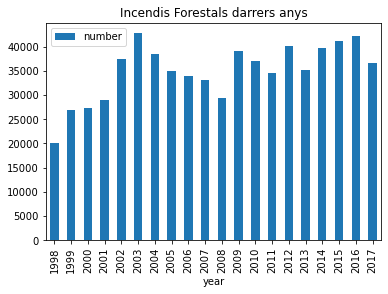

In [167]:
nombreIncendis.plot(kind='bar')
plt.title('Incendis Forestals darrers anys')
plt.show()

Mostreu gràficament la suma total d'incendis per mes per detectar els mesos on es produeixen més incendis



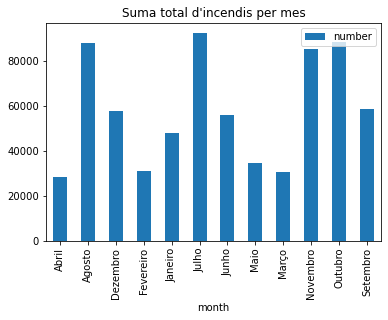

In [168]:
incendisMes = dataAmazon.groupby('month').agg({'number':'sum'})
incendisMes.plot(kind='bar')
plt.title("Suma total d'incendis per mes")
plt.show()

Mostreu també la mitja d'incendis anual, mensual i per estat

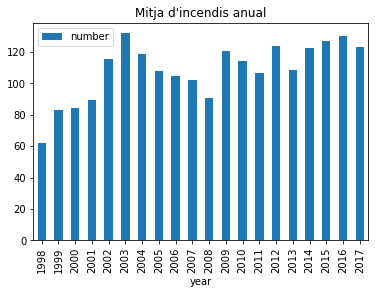

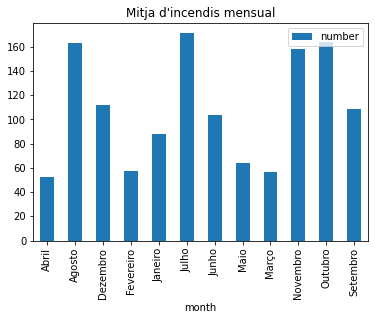

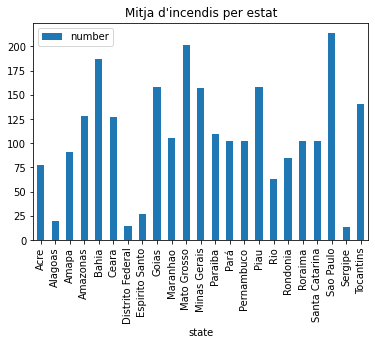

In [169]:
mitjaIncendisAnual = dataAmazon.groupby('year').agg({'number':'mean'})
mitjaIncendisMensual = dataAmazon.groupby('month').agg({'number':'mean'})
mitjaIncendisEstat = dataAmazon.groupby('state').agg({'number':'mean'})
mitjaIncendisAnual.plot(kind='bar')
plt.title("Mitja d'incendis anual")
mitjaIncendisMensual.plot(kind='bar')
plt.title("Mitja d'incendis mensual")
mitjaIncendisEstat.plot(kind='bar')
plt.title("Mitja d'incendis per estat")
plt.show()

Mostreu els estats de Brasil on van enregistrar més de 800 incendis al mes, comptant els mesos de juny, juliol i agost. Heu de mostrar com a resultat una llista dels estats sense repetir.

** La funció unique us pot ser útil

In [170]:
incendisEstat = dataAmazon.query("number > 800 & month in ['Agosto','Junho','Julho']")
incendisEstatUnics = incendisEstat['state'].unique()
print(incendisEstatUnics)

['Acre' 'Amazonas' 'Bahia' 'Goias' 'Maranhao' 'Mato Grosso' 'Minas Gerais'
 'Pará' 'Paraiba' 'Piau' 'Rio' 'Rondonia' 'Sao Paulo' 'Tocantins']


Mostra  gràficament la distrbució d'incendis per estat durant els mesos de juny, juliol i agost

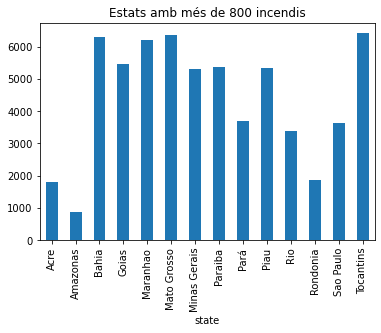

In [171]:
incendisEstat = incendisEstat.groupby('state')['number'].sum()
incendisEstat.plot(kind='bar')
plt.title("Estats amb més de 800 incendis")
plt.show()

Volem buscar aquells estats on durant l'any 2017 van ocórrer més de 800 incendis al mes, durant qualsevol dels mesos de l'any. Heu de mostrar per pantalla l'estat, el mes (o els mesos si la condició es compleix en varis mesos) i el nombre total d'incendis enregistrats en el mes corresponent.

In [172]:
incendisEstat2017 = dataAmazon.query("number > 800 & year == 2017")
print(incendisEstat2017[['state','month','number']])

            state     month  number
698         Amapa  Novembro   858.0
1395        Ceara   Outubro   949.0
1415        Ceara  Novembro   812.0
2271     Maranhao     Junho   885.0
2490  Mato Grosso      Maio   845.0
2610  Mato Grosso  Novembro   813.0
3725      Paraiba     Julho   891.0
3745      Paraiba    Agosto   987.0
4920          Rio     Julho   885.0
4940          Rio    Agosto   819.0
5876    Sao Paulo     Julho   802.0
5896    Sao Paulo    Agosto   981.0


Creeu una còpia del dataframe original per posteriroment exportar-lo a un csv afegint una nova columna que ens indicarà per cada fila el nivell de risc d'aquella fila. Definim tres nivells de risc:
high : si s'ha enregistrat una fila amb més de 800 incendis medium : si s'ha enregistrat una fila amb un nombre d'incendis entre 400 i 800low : si s'ha enregistrat una fila amb menys de 400 incendis
Mostreu per pantalla aquelles files que corresponguin a un nivell de risc alt ( high ).

In [201]:
dataAmazon.loc[dataAmazon.query("number > 800").index, 'risc'] = 'High'
dataAmazon.loc[dataAmazon.query("number <= 800 & number >= 400").index, 'risc'] = 'Medium'
dataAmazon.loc[dataAmazon.query("number < 400").index, 'risc'] = 'Low'
print(dataAmazon.query("risc == 'High'"))

      year      state     month  number        date  risc
148   2006       Acre    Agosto   839.0  2006-01-01  High
149   2007       Acre    Agosto   960.0  2007-01-01  High
197   2015       Acre   Outubro   905.0  2015-01-01  High
676   2015      Amapa   Outubro   827.0  2015-01-01  High
685   2004      Amapa  Novembro   949.0  2004-01-01  High
...    ...        ...       ...     ...         ...   ...
6339  2002  Tocantins     Julho   976.0  2002-01-01  High
6344  2007  Tocantins     Julho   982.0  2007-01-01  High
6346  2009  Tocantins     Julho   989.0  2009-01-01  High
6365  2008  Tocantins    Agosto   845.0  2008-01-01  High
6432  2015  Tocantins  Novembro   833.0  2015-01-01  High

[135 rows x 6 columns]
